# Loan Prediction 

## 1. Problem Defination

In this notebook we will be predicting if a person will get a loan or will not get it

## 2. Data

The data was taken from kaggle's dataset https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

## 3. Evaluation

This is a classification problem.

## 4. Features

* Loan_ID - Unique Loan ID
* Gender - Male/ Female
* Married	Applicant - married (Y/N)
* Dependents - Number of dependents
* Education - Applicant Education (Graduate/ Under Graduate)
* Self_Employed - Self employed (Y/N)
* ApplicantIncome - Applicant income
* CoapplicantIncome - Coapplicant income
* LoanAmount - Loan amount in thousands
* Loan_Amount_Term - Term of loan in months
* Credit_History - credit history meets guidelines
* Property_Area - Urban/ Semi Urban/ Rural
* Loan_Status - Loan approved (Y/N)

In [61]:
# Importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve,confusion_matrix,classification_report

In [2]:
# Loading the training data set
df = pd.read_csv("data/train_u6lujuX_CVtuZ9i.csv").reset_index(drop=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### EDA

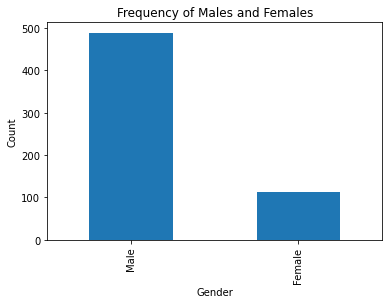

In [5]:
df["Gender"].value_counts().plot(kind = "bar")
plt.title("Frequency of Males and Females")
plt.xlabel("Gender")
plt.ylabel("Count");

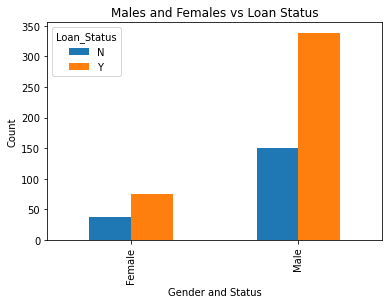

In [6]:
pd.crosstab(df.Gender, df.Loan_Status).plot(kind = "bar");
plt.title("Males and Females vs Loan Status")
plt.xlabel("Gender and Status")
plt.ylabel("Count");

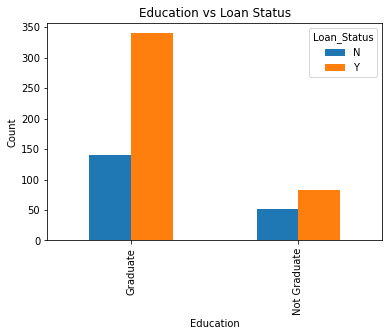

In [7]:
pd.crosstab(df.Education,df.Loan_Status).plot(kind = "bar")
plt.title("Education vs Loan Status");
plt.ylabel("Count");

In [8]:
# Correlation matrix
corr_mat = df.corr()
corr_mat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


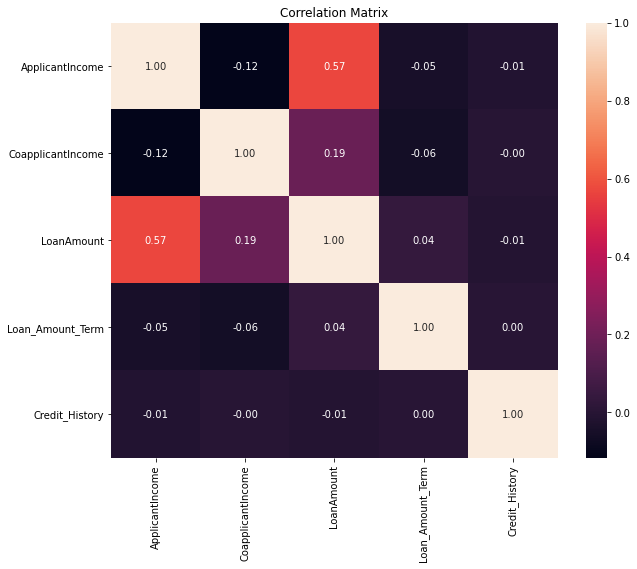

In [9]:
# Visualizing the correlation matrix
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_mat,
            fmt = ".2f",
            annot=True,
            cbar=True)
plt.title("Correlation Matrix");

## Data Cleaning

There are some missing values in the given dataset.

In [10]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Filling the missing data 
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["LoanAmount"].median(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].median(),inplace=True)
df["Dependents"].fillna("0",inplace=True)
df["Gender"].fillna("Male",inplace=True)
df["Self_Employed"].fillna("No",inplace=True)
df["Married"].fillna("Yes",inplace=True)

In [12]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.drop("Loan_ID",axis=1,inplace=True)

In [14]:
# Splitting the data 
X = df.drop("Loan_Status", axis=1)

y = df["Loan_Status"]

In [15]:
# Converting our data into numbers 
# Turning caterories into numbers

cat_features = ["Gender", 
                "Married", 
                "Dependents", 
                "Education", 
                "Self_Employed", 
                "Property_Area"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot, 
                                   cat_features)],
                               remainder="passthrough")
X = transformer.fit_transform(X)
X

array([[  0.,   1.,   1., ..., 128., 360.,   1.],
       [  0.,   1.,   0., ..., 128., 360.,   1.],
       [  0.,   1.,   0., ...,  66., 360.,   1.],
       ...,
       [  0.,   1.,   0., ..., 253., 360.,   1.],
       [  0.,   1.,   0., ..., 187., 360.,   1.],
       [  1.,   0.,   1., ..., 133., 360.,   0.]])

In [16]:
y.replace({"N":0,"Y":1}, inplace = True)
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [17]:
# splitting the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)

## Modelling

Now that we have done the cleaning and EDA, we can proceed towards modelling our data.

The models will we try is:
1. RandomForestClassifier
2. Logistic Regression
3. KNearestNeighbours
4. GradientBoostClassfier

In [18]:
np.random.seed(42)
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNearestNeibours": KNeighborsClassifier(),
    "GradientBoostClassifier": GradientBoostingClassifier()
}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    This fits different model given in the dictionary and scores it.
    """
    model_score={}
    # fitting the model
    for label, model in models.items():
        model.fit(X_train,y_train)
        # scoring the model
        model_score[label] = model.score(X_test,y_test)
    
    return model_score

In [19]:
np.random.seed(42)
fit_and_score(models,X_train,X_test,y_train,y_test)

/home/pratik/Documents/ml/bulldozer-price-prediction/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.7723577235772358,
 'Logistic Regression': 0.7886178861788617,
 'KNearestNeibours': 0.5934959349593496,
 'GradientBoostClassifier': 0.7642276422764228}

We see that GradientBoostClassifier and KNearestNeighbours has less score so we will reject them

## Tuning Hyperparameters
We will be using RandomSearchCV to tune the hyperparameters  

In [20]:
# Setting up grids
rf_grid = {
    "n_estimators": np.arange(10,500,50),
    "max_depth": [None,2,3,5,10],
    "min_samples_split": np.arange(1,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

lr_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

## RandomForest

In [23]:
# setting up random seed

np.random.seed(42)

# setting up random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          rf_grid, 
                          n_iter=50,
                          n_jobs=-1,
                          cv=5,
                          verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/pratik/Documents/ml/bulldozer-price-prediction/env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.7982684  0.79231086 0.80643166 0.80853432 0.81055452 0.80853432
 0.81255411 0.78006597 0.81049268 0.77600495 0.79633065 0.79633065
 0.80651412 0.79426922 0.80449392 0.81257473 0.80643166 0.78204494
        nan 0.80449392 0.80849309 0.80449392 0.81053391 0.79231086
 0.76584209        nan 0.8105133  0.79024943        nan 0.80045351
 0.75365904 0.77602556 0.76580087        nan 0.80247372 0.7475572
 0.80247372 0.78820862 0.80449392        nan 0.81055452 0.81255411
 0.81255411 0.80851371 0.78618841 0.78822923 0.77600495 0.77802515
 0.8004329  0.79433107]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   verbose=True)

In [24]:
rs_rf.score(X_test,y_test)

0.7886178861788617

## Logistic Regression

In [25]:
# setting up random seed
np.random.seed(42)

# setting up random hyperparameter search
rs_lr = RandomizedSearchCV(LogisticRegression(),
                          lr_grid, 
                          n_iter=50,
                          n_jobs=-1,
                          cv=5,
                          verbose=True)
rs_lr.fit(X_train,y_train)

/home/pratik/Documents/ml/bulldozer-price-prediction/env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_lr.score(X_test,y_test)

0.7886178861788617

## Using GridSearchCV

We will first try for RandomForestClassifier

In [31]:
# Setting up grids
rf_gs_grid = {
    "n_estimators": np.arange(1,100,20),
    "max_depth": [None,2,3],
    "min_samples_split": np.arange(1,20,5),
    "min_samples_leaf": np.arange(1,20,5)
}

In [32]:
# setting up random seed
np.random.seed(42)

# setting up random hyperparameter search
gs_rf = GridSearchCV(RandomForestClassifier(),
                          rf_gs_grid, 
                          n_jobs=-1,
                          cv=5,
                          verbose=True)
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/home/pratik/Documents/ml/bulldozer-price-prediction/env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.68837353
 0.81041022 0.79626881 0.8002886  0.80843125 0.73516801 0.79214595
 0.80437023 0.80030921 0.81049268 0.72702536 0.80437023 0.81047207
 0.80845187 0.80641105        nan        nan        nan        nan
        nan 0.68653886 0.80647289 0.80645228 0.81459493 0.81255411
 0.67633478 0.80643166 0.81255411 0.80649351 0.80847248 0.7435168
 0.80441146 0.80443208 0.81459493 0.8105133         nan        nan
        nan        nan        nan 0.74935065 0.77590188 0.80651412
 0.80045351 0.7984127  0.68225108 0.79433107 0.79641311 0.80439085
 0.80651412 0.68835292 0.80241187 0.7984127  0.79843331 0.8105133
        nan        nan        nan        nan        nan 0.72494331
 0.77592249 0.78820862 0.77598433 0.79426922 0.66602762 0.80849309
 0.7963925  0

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3],
                         'min_samples_leaf': array([ 1,  6, 11, 16]),
                         'min_samples_split': array([ 1,  6, 11, 16]),
                         'n_estimators': array([ 1, 21, 41, 61, 81])},
             verbose=True)

In [34]:
gs_rf.score(X_test,y_test)

0.7886178861788617

Trying for Logistic Regression

In [35]:
lr_gs_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear", "newton-cg", "lbfgs"]
}

In [36]:
# setting up random seed
np.random.seed(42)

# setting up random hyperparameter search
gs_lr = GridSearchCV(LogisticRegression(),
                          lr_gs_grid,
                          n_jobs=-1,
                          cv=5,
                          verbose=True)
gs_lr.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             verbose=True)

In [45]:
gs_lr.score(X_test,y_test)

0.7886178861788617

Since both the scores are same, we will be using RandomForestClassifier()

## Evaluating our model

In [47]:
# Making predictions with our tuned model
y_preds = gs_rf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

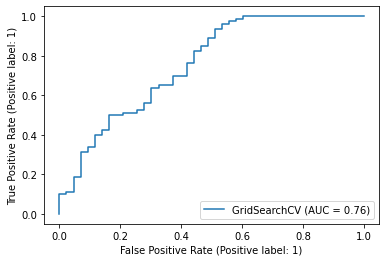

In [50]:
# plotting ROC curve
plot_roc_curve(gs_rf,X_test,y_test);

In [52]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[18 25]
 [ 1 79]]


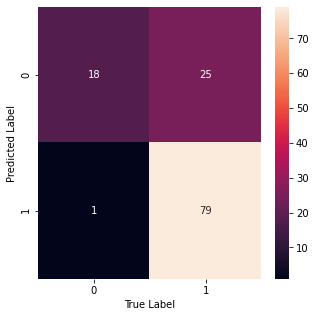

In [56]:
def plot_confusion_matrix(y_test,y_preds):
    """
    Plots a confusion matrix using seaborn
    """
    fig,ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_confusion_matrix(y_test,y_preds)

In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



## Calculating cross-val score

In [59]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 61}

In [60]:
# creating new classifier with the best parameters
clf = RandomForestClassifier(n_estimators=61,
                             max_depth=None,
                             min_samples_leaf=6,
                             min_samples_split=6)

In [72]:
# calculating the cross-val score
cv_acc = cross_val_score(clf,X,y,scoring="accuracy",cv=5)
cv_acc= cv_acc.mean()
cv_acc

0.809462881514061

In [77]:
# calculating the cross-val precision
cv_precision = cross_val_score(clf,X,y,scoring="precision",cv=5)
cv_precision = cv_precision.mean()
cv_precision

0.7910806823942073

In [75]:
# calculating the cross-val RECALL
cv_recall = cross_val_score(clf,X,y,scoring="recall",cv=5)
cv_recall = cv_recall.mean()
cv_recall

0.9834173669467787

In [76]:
# calculating the cross-val f1
cv_f1 = cross_val_score(clf,X,y,scoring="f1",cv=5)
cv_f1 = cv_f1.mean()
cv_f1

0.8755078396804716

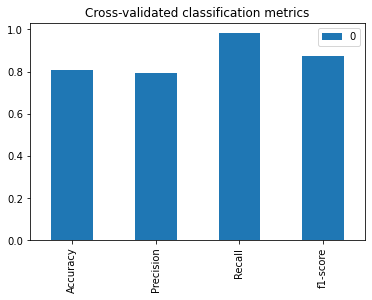

In [80]:
cv_metrics = pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "f1-score":cv_f1
},index=[0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics");

## Feature Importance

In [82]:
# Fitting 
clf = RandomForestClassifier(n_estimators=61,
                             max_depth=None,
                             min_samples_leaf=6,
                             min_samples_split=6)
clf.fit(X_train,y_train);

In [84]:
clf.feature_importances_

array([0.00729237, 0.00791554, 0.02571834, 0.0168426 , 0.01189489,
       0.01670215, 0.00620809, 0.00357567, 0.01095326, 0.01213414,
       0.00598788, 0.00449515, 0.02856808, 0.04314769, 0.01571555,
       0.09996682, 0.0838105 , 0.12155456, 0.02542386, 0.45209287])

In [86]:
# matching feature importance to the columns
features_dict = dict(zip(df.columns,list(clf.feature_importances_)))
features_dict

{'Gender': 0.0072923687697323495,
 'Married': 0.007915535480545377,
 'Dependents': 0.025718338622614415,
 'Education': 0.0168425996755346,
 'Self_Employed': 0.011894890768167124,
 'ApplicantIncome': 0.01670214552701183,
 'CoapplicantIncome': 0.006208092807251152,
 'LoanAmount': 0.0035756707486600324,
 'Loan_Amount_Term': 0.010953255880718353,
 'Credit_History': 0.01213413647390799,
 'Property_Area': 0.005987882614032735,
 'Loan_Status': 0.004495147800266877}

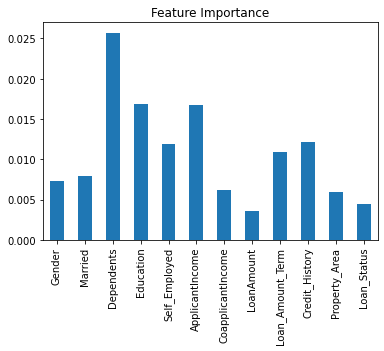

In [88]:
# Visualizing the feature importacnce
feature_df = pd.DataFrame(features_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False);

From the above graph we can see that Dependencies was the most important feature in prediction of the loan status